# # DSO110-Final Project "Food Insecurity"

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.express as px
import scipy
from scipy import stats
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Read-in Data
## Head()
### Best way to always call your datasets to insure it's properly loaded up

In [2]:
food_insecurity = pd.read_excel("C:/Users/Ivette/OneDrive/New folder/DSO 110 Final Project/State_Data_Multiple_Years.xlsx")
pd.set_option('display.max_columns', None)
food_insecurity.head()

C:\Users\Ivette\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


,State,2009 Food Insecurity Rate,Number of Food Insecure Persons in 2009,2009 Cost Per Meal,2009 Child Food Insecurity Rate,Number of Food Insecure Children in 2009,2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2009 Weighted Annual Food Budget Shortfall,2010 Food Insecurity Rate,Number of Food Insecure Persons in 2010,2010 Cost Per Meal,2010 Child Food Insecurity Rate,Number of Food Insecure Children in 2010,2010 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2010 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2010 Weighted Annual Food Budget Shortfall,2011 Food Insecurity Rate,Number of Food Insecure Persons in 2011,2011 Cost Per Meal,2011 Child Food Insecurity Rate,Number of Food Insecure Children in 2011,2011 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2011 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2011 Weighted Annual Food Budget Shortfall,2012 Food Insecurity Rate,Number of Food Insecure Persons in 2012,2012 Cost Per Meal,2012 Child Food Insecurity Rate,Number of Food Insecure Children in 2012,2012 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2012 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2012 Weighted Annual Food Budget Shortfall,2013 Food Insecurity Rate,Number of Food Insecure Persons in 2013,2013 Cost Per Meal,2013 Child Food Insecurity Rate,Number of Food Insecure Children in 2013,2013 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2013 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2013 Weighted Annual Food Budget Shortfall,2014 Food Insecurity Rate,Number of Food Insecure Persons in 2014,2014 Cost Per Meal,2014 Child Food Insecurity Rate,Number of Food Insecure Children in 2014,2014 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2014 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2014 Weighted Annual Food Budget Shortfall,2015 Food Insecurity Rate,Number of Food Insecure Persons in 2015,2015 Cost Per Meal,2015 Child Food Insecurity Rate,Number of Food Insecure Children in 2015,2015 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2015 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2015 Weighted Annual Food Budget Shortfall,2016 Food Insecurity Rate,Number of Food Insecure Persons in 2016,2016 Cost Per Meal,2016 Child Food Insecurity Rate,Number of Food Insecure Children in 2016,2016 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2016 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2016 Weighted Annual Food Budget Shortfall,2017 Food Insecurity Rate,Number of Food Insecure Persons in 2017,2017 Cost Per Meal,2017 Child Food Insecurity Rate,Number of Food Insecure Children in 2017,2017 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2017 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2017 Weighted Annual Food Budget Shortfall,2018 Food Insecurity Rate,Number of Food Insecure Persons in 2018,2018 Cost Per Meal,2018 Child Food Insecurity Rate,Number of Food Insecure Children in 2018,2018 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2018 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2018 Weighted Annual Food Budget Shortfall,2019 Food Insecurity Rate,Number of Food Insecure Persons in 2019,2019 Cost Per Meal,2019 Child Food Insecurity Rate,Number of Food Insecure Children in 2019,2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2019 Weighted Annual Food Budget Shortfall
0,AK,0.135,90300,NaN,0.212,38090,0.55,0.45,NaN,0.146376,104510,2.67,0.199105,36670,0.54,0.46,48031340,0.194974,936410,2.64,0.263225,292740,0.748514,0.251486,403023850,0.185696,895430,2.745306,0.257749,289960,0.74,0.26,430525000,0.188006,908770,2.76,0.261767,294060,0.76,0.24,444265000,0.188,911440,2.90,0.264,292330,0.73,0.27,466367000,0.177,859380,2.92,0.241,267040,0.73,0.27,450670000,0.165,800

In [3]:
food_insecurity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 89 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   State                                                           51 non-null     object 
 1   2009 Food Insecurity Rate                                       51 non-null     float64
 2   Number of Food Insecure Persons in 2009                         51 non-null     int64  
 3   2009 Cost Per Meal                                              49 non-null     float64
 4   2009 Child Food Insecurity Rate                                 51 non-null     float64
 5   Number of Food Insecure Children in 2009                        51 non-null     int64  
 6   2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL  51 non-null     float64
 7   2009 % Food Insecure Children in HH w/HH Incomes Above 

# # Describe
The describe() function allows you to very quickly look @ some basic descriptive statistics for the numerical features in the data sets.

In [4]:
food_insecurity.describe()

,2009 Food Insecurity Rate,Number of Food Insecure Persons in 2009,2009 Cost Per Meal,2009 Child Food Insecurity Rate,Number of Food Insecure Children in 2009,2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2009 Weighted Annual Food Budget Shortfall,2010 Food Insecurity Rate,Number of Food Insecure Persons in 2010,2010 Cost Per Meal,2010 Child Food Insecurity Rate,Number of Food Insecure Children in 2010,2010 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2010 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2010 Weighted Annual Food Budget Shortfall,2011 Food Insecurity Rate,Number of Food Insecure Persons in 2011,2011 Cost Per Meal,2011 Child Food Insecurity Rate,Number of Food Insecure Children in 2011,2011 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2011 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2011 Weighted Annual Food Budget Shortfall,2012 Food Insecurity Rate,Number of Food Insecure Persons in 2012,2012 Cost Per Meal,2012 Child Food Insecurity Rate,Number of Food Insecure Children in 2012,2012 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2012 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2012 Weighted Annual Food Budget Shortfall,2013 Food Insecurity Rate,Number of Food Insecure Persons in 2013,2013 Cost Per Meal,2013 Child Food Insecurity Rate,Number of Food Insecure Children in 2013,2013 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2013 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2013 Weighted Annual Food Budget Shortfall,2014 Food Insecurity Rate,Number of Food Insecure Persons in 2014,2014 Cost Per Meal,2014 Child Food Insecurity Rate,Number of Food Insecure Children in 2014,2014 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2014 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2014 Weighted Annual Food Budget Shortfall,2015 Food Insecurity Rate,Number of Food Insecure Persons in 2015,2015 Cost Per Meal,2015 Child Food Insecurity Rate,Number of Food Insecure Children in 2015,2015 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2015 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2015 Weighted Annual Food Budget Shortfall,2016 Food Insecurity Rate,Number of Food Insecure Persons in 2016,2016 Cost Per Meal,2016 Child Food Insecurity Rate,Number of Food Insecure Children in 2016,2016 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2016 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2016 Weighted Annual Food Budget Shortfall,2017 Food Insecurity Rate,Number of Food Insecure Persons in 2017,2017 Cost Per Meal,2017 Child Food Insecurity Rate,Number of Food Insecure Children in 2017,2017 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2017 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2017 Weighted Annual Food Budget Shortfall,2018 Food Insecurity Rate,Number of Food Insecure Persons in 2018,2018 Cost Per Meal,2018 Child Food Insecurity Rate,Number of Food Insecure Children in 2018,2018 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2018 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2018 Weighted Annual Food Budget Shortfall,2019 Food Insecurity Rate,Number of Food Insecure Persons in 2019,2019 Cost Per Meal,2019 Child Food Insecurity Rate,Number of Food Insecure Children in 2019,2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2019 Weighted Annual Food Budget Shortfall
count,51.000000,5.100000e+01,49.000000,51.000000,5.100000e+01,51.000000,51.000000,4.900000e+01,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.0000

In [5]:
food_insecurity.dtypes

State                                                              object
2009 Food Insecurity Rate                                         float64
Number of Food Insecure Persons in 2009                             int64
2009 Cost Per Meal                                                float64
2009 Child Food Insecurity Rate                                   float64
                                                                   ...   
2019 Child Food Insecurity Rate                                   float64
Number of Food Insecure Children in 2019                            int64
2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL    float64
2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL    float64
2019 Weighted Annual Food Budget Shortfall                          int64
Length: 89, dtype: object

# Exploratory Analysis
### Using the data we wrangled State_Data_Multiple_Years

In [6]:
food_insecurity.shape

(51, 89)

# Examine all Columns for Normality

array([[<AxesSubplot:title={'center':'2009 Food Insecurity Rate '}>,
        <AxesSubplot:title={'center':'Number of Food Insecure Persons in 2009'}>,
        <AxesSubplot:title={'center':'2009 Cost Per Meal'}>,
        <AxesSubplot:title={'center':'2009 Child Food Insecurity Rate'}>,
        <AxesSubplot:title={'center':'Number of Food Insecure Children in 2009'}>,
        <AxesSubplot:title={'center':'2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL'}>,
        <AxesSubplot:title={'center':'2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL'}>,
        <AxesSubplot:title={'center':'2009 Weighted Annual Food Budget Shortfall'}>,
        <AxesSubplot:title={'center':'2010 Food Insecurity Rate'}>],
       [<AxesSubplot:title={'center':'Number of Food Insecure Persons in 2010'}>,
        <AxesSubplot:title={'center':'2010 Cost Per Meal'}>,
        <AxesSubplot:title={'center':'2010 Child Food Insecurity Rate'}>,
        <AxesSubplot:title={'center':'Number of Fo

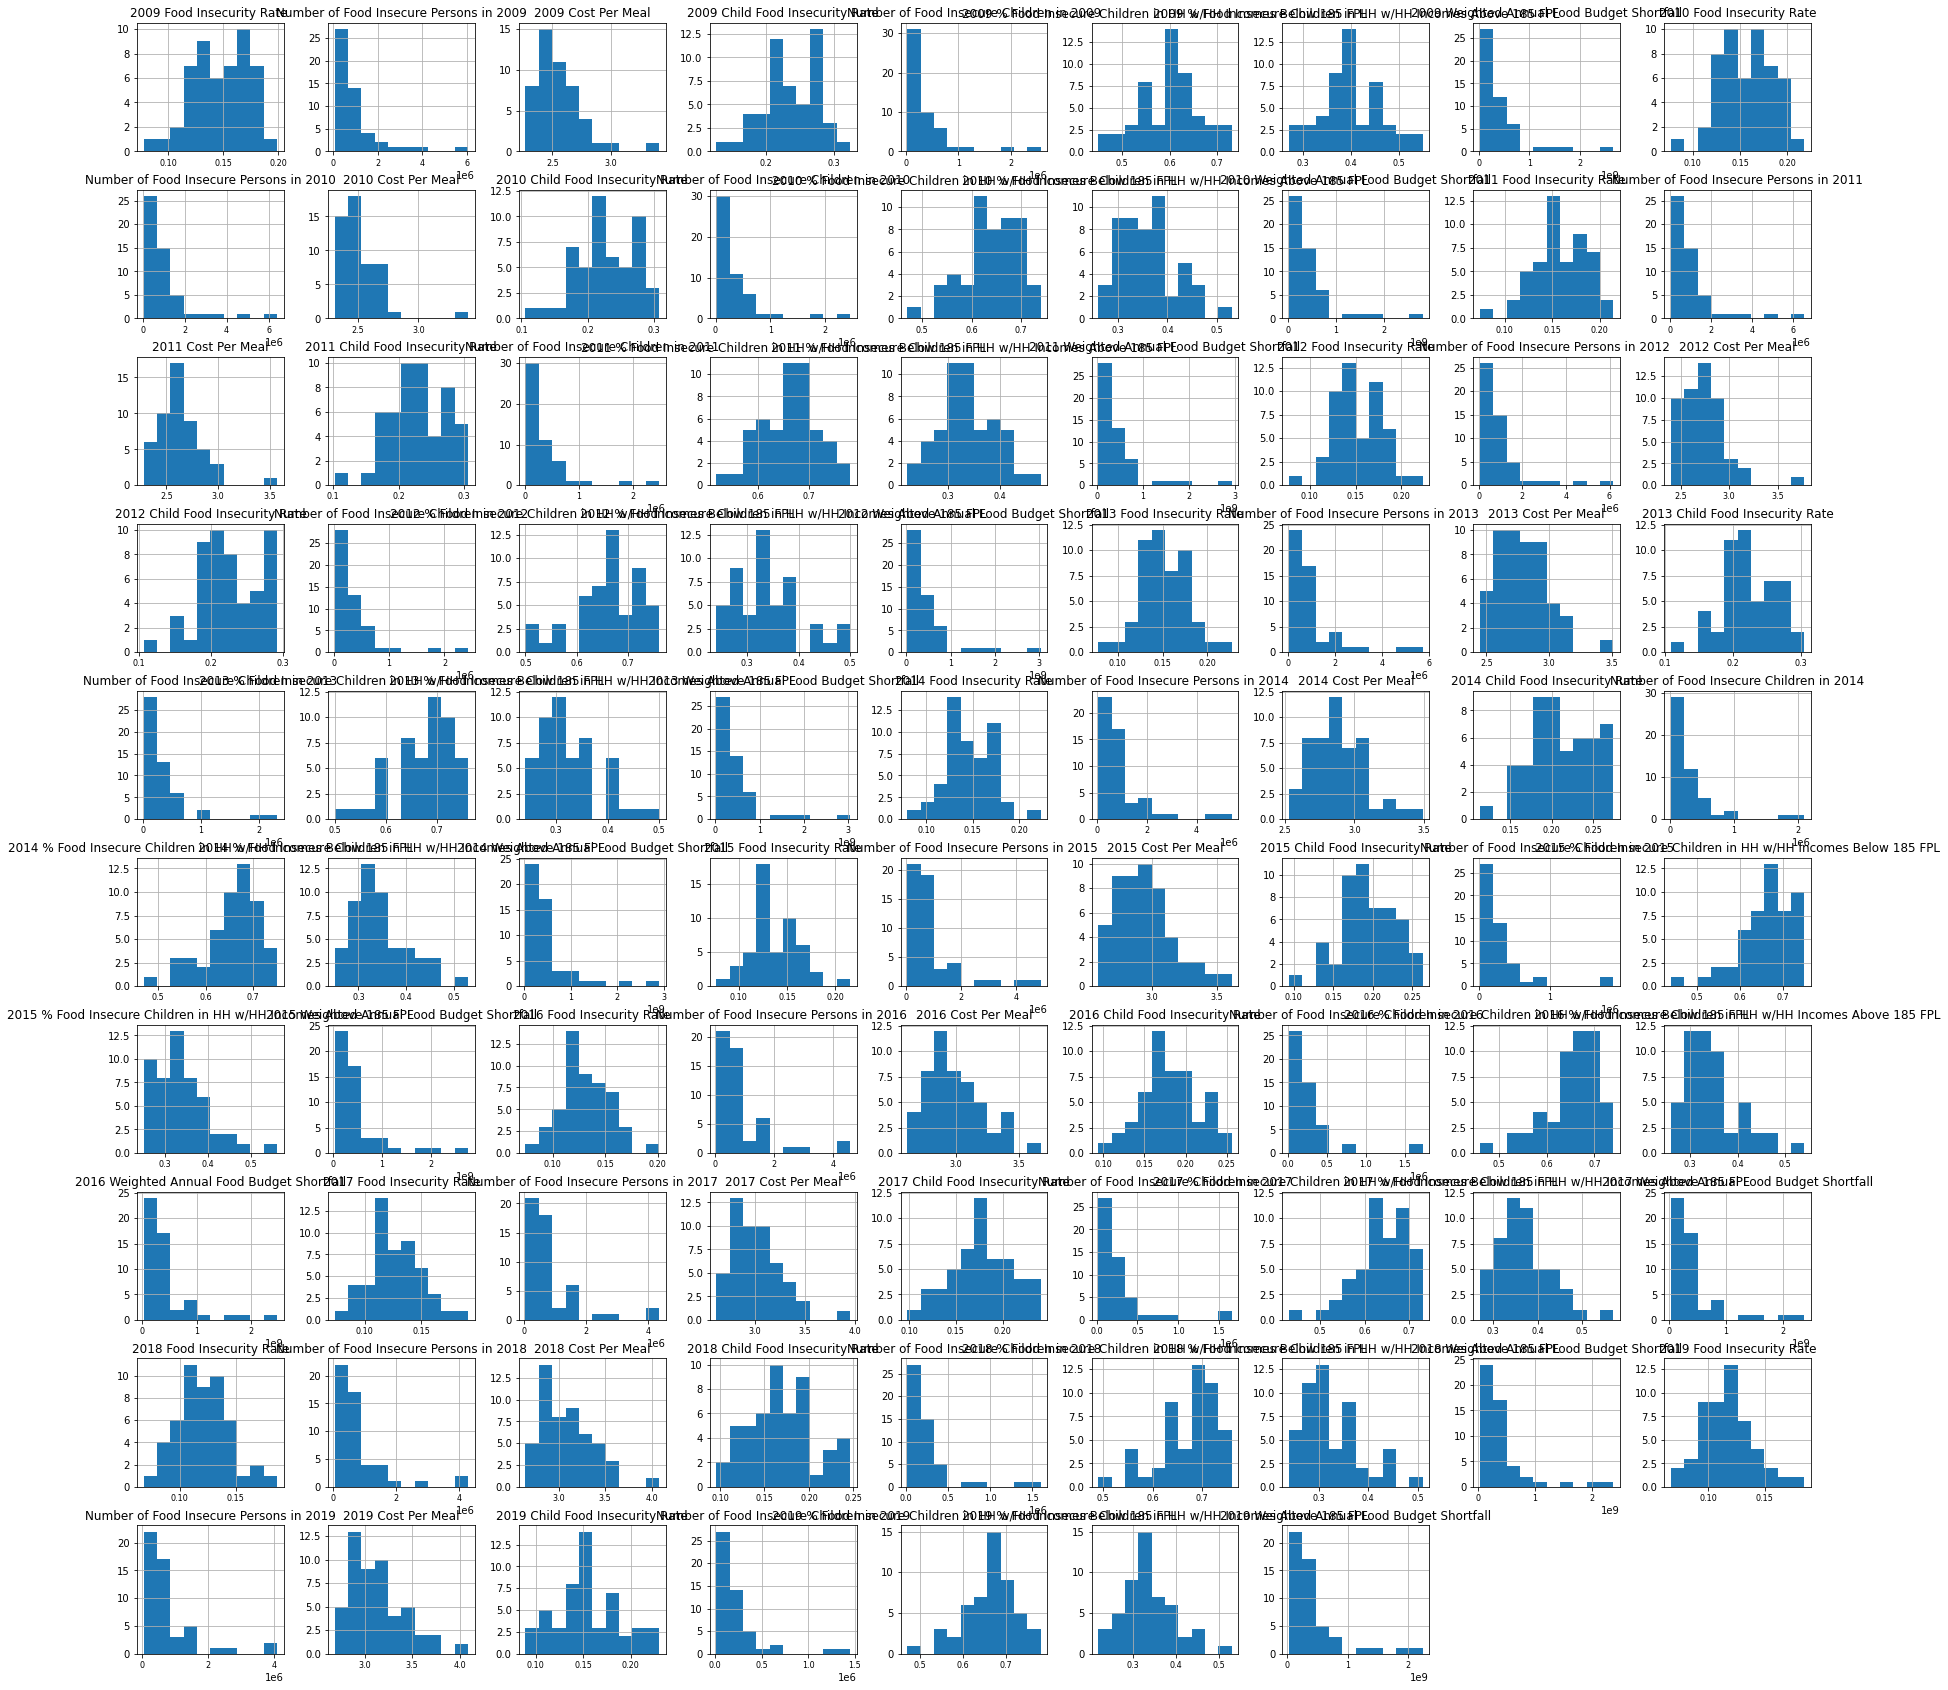

In [7]:
food_insecurity.hist(xlabelsize=8, figsize=(30,30))
#how numerical values distribute in the data

# nlargest()
We can combat by using the nlargest() function, to select the largest values in a given column to graph for this. Select the 10 largest values in our column

<AxesSubplot:title={'center':'State'}>

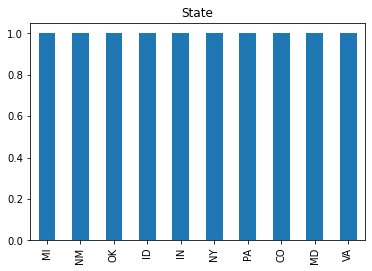

In [8]:
plt.title('State')
food_insecurity['State'].value_counts().nlargest(10).plot.bar()

<AxesSubplot:title={'center':'2019 Cost Per Meal'}>

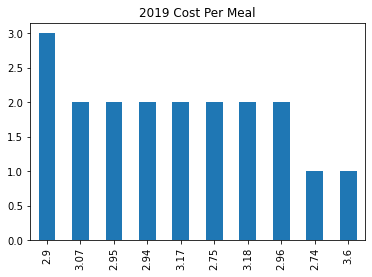

In [9]:
plt.title('2019 Cost Per Meal')
food_insecurity['2019 Cost Per Meal'].value_counts().nlargest(10).plot.bar()

<AxesSubplot:title={'center':'2009 Cost Per Meal'}>

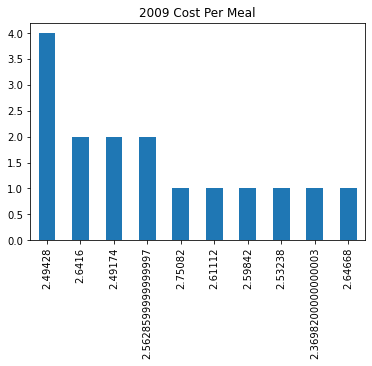

In [10]:
plt.title('2009 Cost Per Meal')
food_insecurity['2009 Cost Per Meal'].value_counts().nlargest(10).plot.bar()

<AxesSubplot:title={'center':'2019 Cost Per Meal'}>

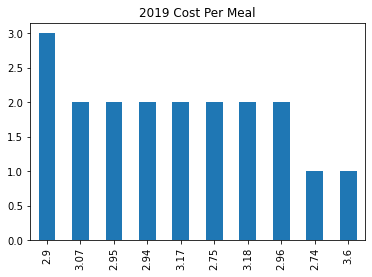

In [11]:
plt.title('2019 Cost Per Meal')
food_insecurity['2019 Cost Per Meal'].value_counts().nlargest(10).plot.bar()

<AxesSubplot:title={'center':'2009 Child Food Insecurity Rate'}>

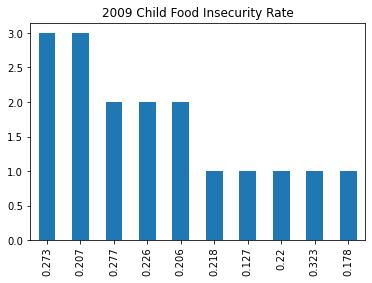

In [12]:
plt.title('2009 Child Food Insecurity Rate')
food_insecurity['2009 Child Food Insecurity Rate'].value_counts().nlargest(10).plot.bar()

<AxesSubplot:title={'center':'2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL'}>

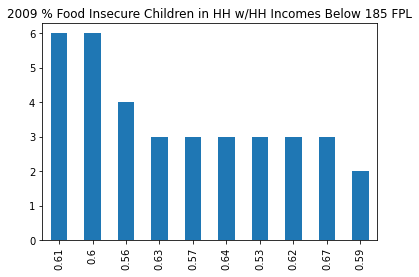

In [13]:
plt.title('2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL')
food_insecurity['2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL'].value_counts().nlargest(10).plot.bar()

In [14]:
# State Level of Food Insecurity for 2009
food_insecurity['State levels_insecurity'] = food_insecurity['Number of Food Insecure Persons in 2009'] - (food_insecurity['2009 Weighted Annual Food Budget Shortfall'] + food_insecurity['2009 Cost Per Meal'])
food_insecurity.tail()

,State,2009 Food Insecurity Rate,Number of Food Insecure Persons in 2009,2009 Cost Per Meal,2009 Child Food Insecurity Rate,Number of Food Insecure Children in 2009,2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2009 Weighted Annual Food Budget Shortfall,2010 Food Insecurity Rate,Number of Food Insecure Persons in 2010,2010 Cost Per Meal,2010 Child Food Insecurity Rate,Number of Food Insecure Children in 2010,2010 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2010 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2010 Weighted Annual Food Budget Shortfall,2011 Food Insecurity Rate,Number of Food Insecure Persons in 2011,2011 Cost Per Meal,2011 Child Food Insecurity Rate,Number of Food Insecure Children in 2011,2011 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2011 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2011 Weighted Annual Food Budget Shortfall,2012 Food Insecurity Rate,Number of Food Insecure Persons in 2012,2012 Cost Per Meal,2012 Child Food Insecurity Rate,Number of Food Insecure Children in 2012,2012 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2012 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2012 Weighted Annual Food Budget Shortfall,2013 Food Insecurity Rate,Number of Food Insecure Persons in 2013,2013 Cost Per Meal,2013 Child Food Insecurity Rate,Number of Food Insecure Children in 2013,2013 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2013 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2013 Weighted Annual Food Budget Shortfall,2014 Food Insecurity Rate,Number of Food Insecure Persons in 2014,2014 Cost Per Meal,2014 Child Food Insecurity Rate,Number of Food Insecure Children in 2014,2014 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2014 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2014 Weighted Annual Food Budget Shortfall,2015 Food Insecurity Rate,Number of Food Insecure Persons in 2015,2015 Cost Per Meal,2015 Child Food Insecurity Rate,Number of Food Insecure Children in 2015,2015 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2015 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2015 Weighted Annual Food Budget Shortfall,2016 Food Insecurity Rate,Number of Food Insecure Persons in 2016,2016 Cost Per Meal,2016 Child Food Insecurity Rate,Number of Food Insecure Children in 2016,2016 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2016 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2016 Weighted Annual Food Budget Shortfall,2017 Food Insecurity Rate,Number of Food Insecure Persons in 2017,2017 Cost Per Meal,2017 Child Food Insecurity Rate,Number of Food Insecure Children in 2017,2017 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2017 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2017 Weighted Annual Food Budget Shortfall,2018 Food Insecurity Rate,Number of Food Insecure Persons in 2018,2018 Cost Per Meal,2018 Child Food Insecurity Rate,Number of Food Insecure Children in 2018,2018 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2018 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2018 Weighted Annual Food Budget Shortfall,2019 Food Insecurity Rate,Number of Food Insecure Persons in 2019,2019 Cost Per Meal,2019 Child Food Insecurity Rate,Number of Food Insecure Children in 2019,2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2019 Weighted Annual Food Budget Shortfall,State levels_insecurity
46,VT,0.133,82270,3.01498,0.207,27160,0.53,0.47,41440980.0,0.140999,88260,2.53,0.204595,25960,0.60,0.40,38436170,0.126810,1026730,2.76,0.165120,301980,0.613517,0.386483,461983120,0.121371,993530,2.861861,0.161540,299600,0.62,0.38,497973000,0.118959,982650,2.92,0.167784,311410,0.65,0.35,508665000,0.118,983880,3.01,0.160,299050,0.64,0.36,523149000,0.112,935480,3.03,0.144,

In [15]:
statewise = pd.pivot_table(food_insecurity, values = ["Number of Food Insecure Persons in 2009", "2009 Weighted Annual Food Budget Shortfall", "2009 Cost Per Meal"], index = "State", aggfunc = max)

In [16]:
statewise["2019 Cost Per Meal"] = statewise["Number of Food Insecure Persons in 2009"]*100/statewise["2009 Cost Per Meal"]

In [17]:
statewise["2019 Weighted Annual Food Budget Shortfall"] = statewise["Number of Food Insecure Persons in 2009"]*100/statewise["2009 Cost Per Meal"]

In [18]:
statewise = statewise.sort_values(by = "State", ascending = False)

In [19]:
statewise.style.background_gradient(cmap = "cubehelix")

,2009 Cost Per Meal,2009 Weighted Annual Food Budget Shortfall,Number of Food Insecure Persons in 2009,2019 Cost Per Meal,2019 Weighted Annual Food Budget Shortfall
State,,,,,
WY,2.575560,27229660.000000,63280,2456941.403035,2456941.403035
WV,2.491740,105565460.000000,253580,10176824.227247,10176824.227247
WI,2.329180,285310530.000000,733180,31478030.894993,31478030.894993
WA,2.585720,412052030.000000,953820,36887984.777934,36887984.777934
VT,3.014980,41440980.000000,82270,2728707.984796,2728707.984796
VA,2.682240,409046470.000000,912790,34030884.633739,34030884.633739
UT,2.446020,163284940.000000,399560,16335107.644255,16335107.644255
TX,2.359660,1673903770.000000,4245970,179939906.596713,179939906.596713
TN,2.578100,458364340.000000,1064160,41276909.351848,41276909.351848


In [20]:
#Top 10 states with highest Food Insecurity
top_10_highest_Food_Insufficiency = food_insecurity.groupby(by = 'State').max()[['2019 Cost Per Meal', 'Number of Food Insecure Persons in 2009']].sort_values(by = ['State'], ascending = False).reset_index()

In [21]:
#Top 10 states with highest Food Insecurity
top_10_highest_Food_Insufficiency = food_insecurity.groupby(by = 'State').max()[['2009 Weighted Annual Food Budget Shortfall', '2019 Cost Per Meal']].sort_values(by = ['State'], ascending = False).reset_index()

In [22]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 States with the Highest Food Insecurity')

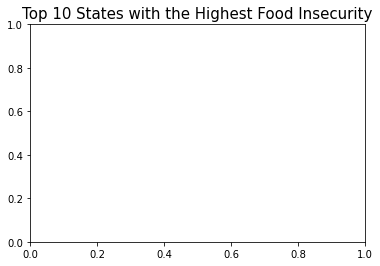

In [23]:
plt.title("Top 10 States with the Highest Food Insecurity", size = 15)

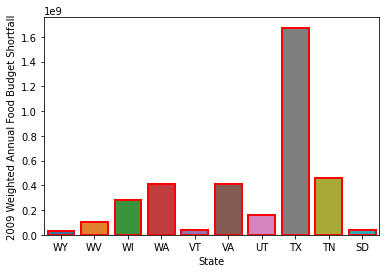

In [24]:
ax = sns.barplot(data = top_10_highest_Food_Insufficiency.iloc[:10], y = "2009 Weighted Annual Food Budget Shortfall", x = "State", linewidth = 2, edgecolor = 'red')

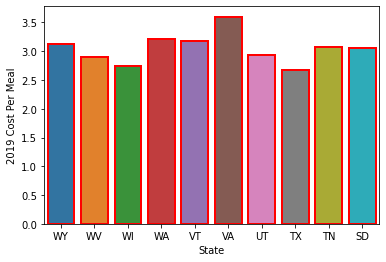

In [25]:
ax = sns.barplot(data = top_10_highest_Food_Insufficiency.iloc[:10], y = "2019 Cost Per Meal", x = "State", linewidth = 2, edgecolor = 'red')

#  Bar Chart

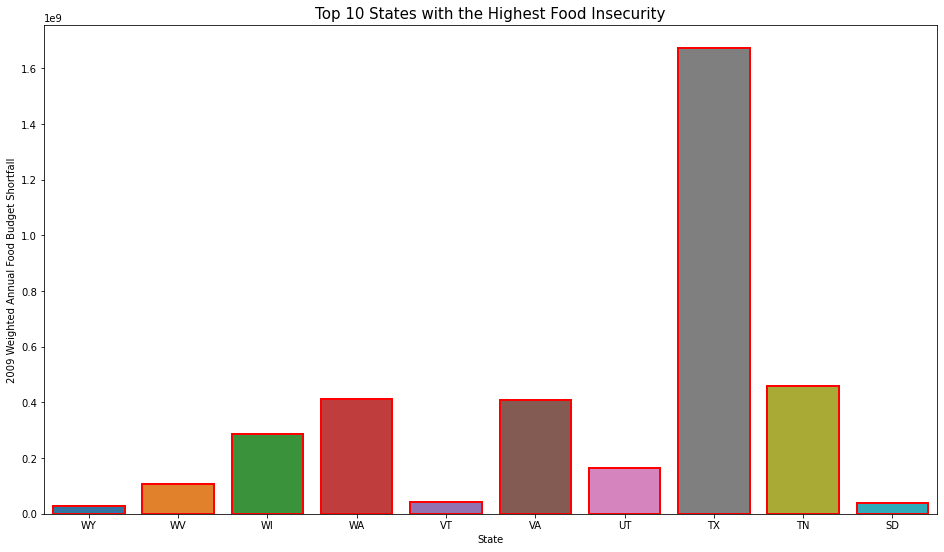

In [26]:
#Top 10 states with highest Food Insecurity

top_10_highest_Food_Insufficiency = food_insecurity.groupby(by = 'State').max()[['2009 Weighted Annual Food Budget Shortfall', '2019 Cost Per Meal']].sort_values(by = ['State'], ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 States with the Highest Food Insecurity", size = 15)
ax = sns.barplot(data = top_10_highest_Food_Insufficiency.iloc[:10], y = "2009 Weighted Annual Food Budget Shortfall", x = "State", linewidth = 2, edgecolor = 'red')
plt.xlabel("State")
plt.ylabel("2009 Weighted Annual Food Budget Shortfall")
plt.show()

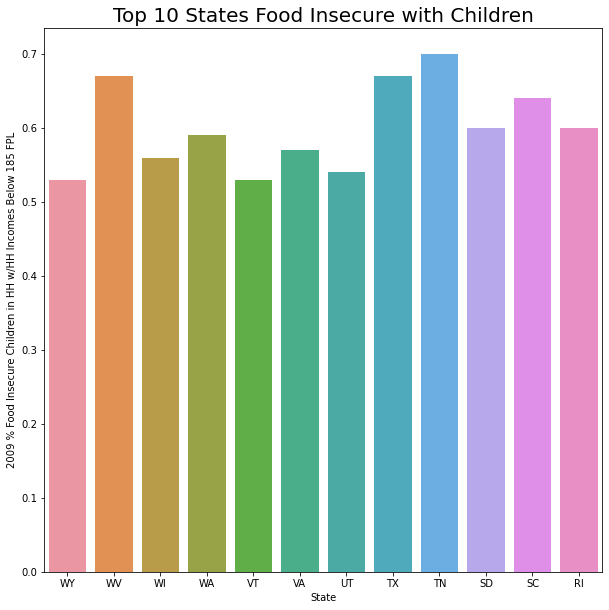

In [27]:
#Top states with highest HH income

top_10_HH = food_insecurity.groupby(by = 'State').max()[['Number of Food Insecure Persons in 2009', '2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States Food Insecure with Children", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:12], y = "2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL")
plt.show()

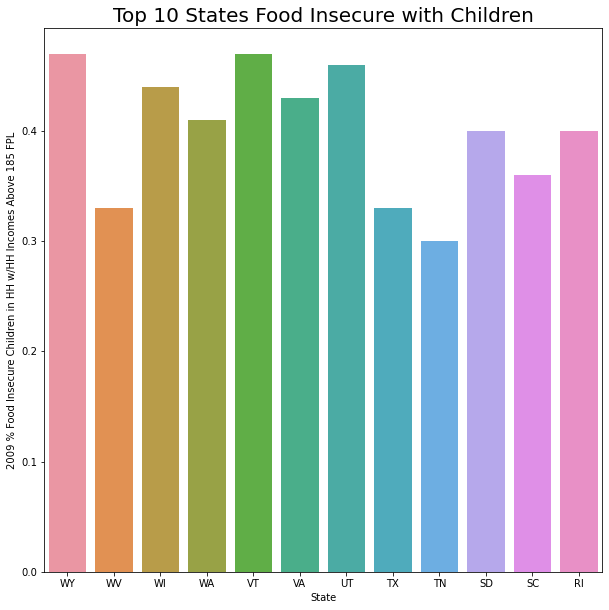

In [28]:
#Top states with highest HH income

top_10_HH = food_insecurity.groupby(by = 'State').max()[['Number of Food Insecure Persons in 2009', '2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States Food Insecure with Children", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:12], y = "2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL")
plt.show()

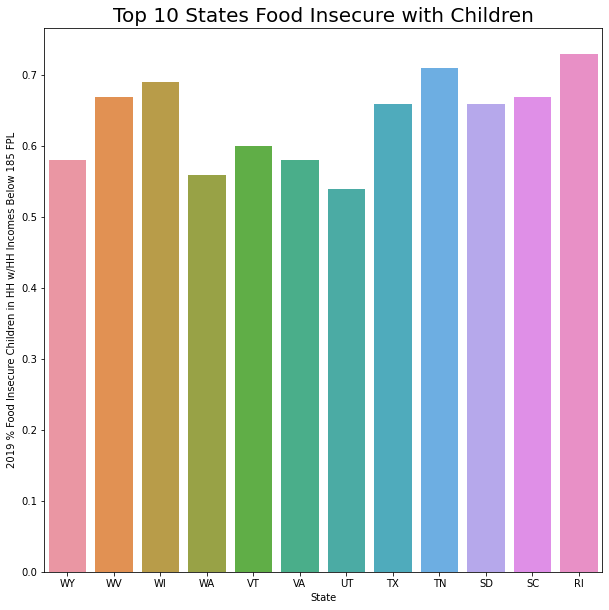

In [29]:
#Top states with highest HH income

top_10_HH = food_insecurity.groupby(by = 'State').max()[['Number of Food Insecure Persons in 2009', '2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States Food Insecure with Children", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:12], y = "2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL")
plt.show()

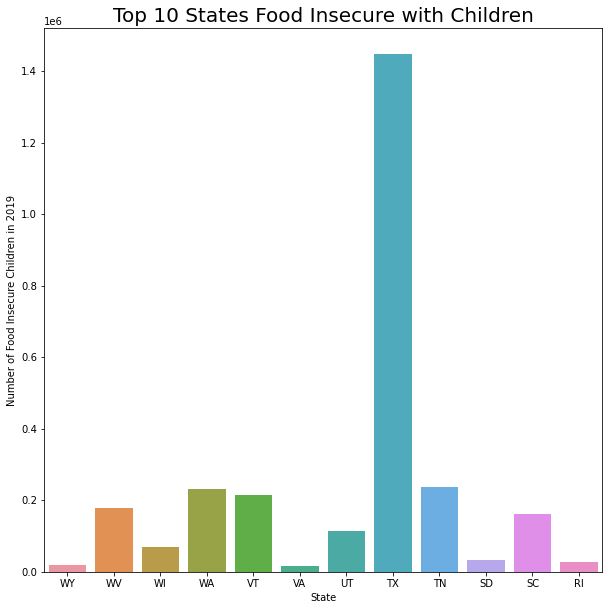

In [30]:
top_10_HH = food_insecurity.groupby(by = 'State').max()[['2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL', 'Number of Food Insecure Children in 2019']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States Food Insecure with Children", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:12], y = "Number of Food Insecure Children in 2019", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("Number of Food Insecure Children in 2019")
plt.show()

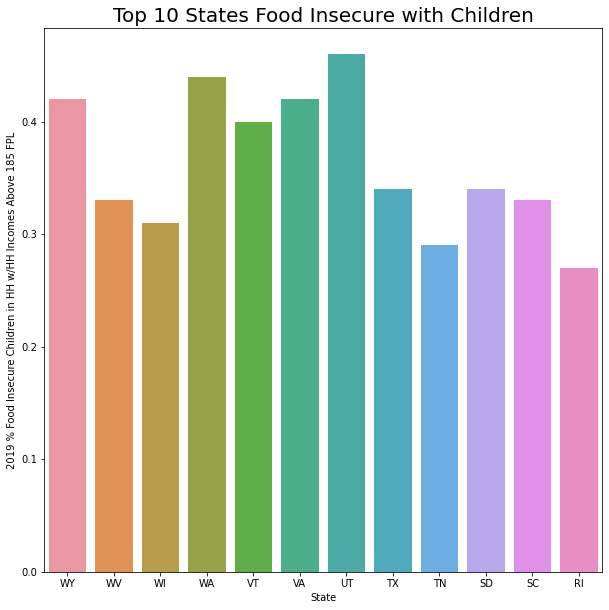

In [31]:
#Top states with highest HH income

top_10_HH = food_insecurity.groupby(by = 'State').max()[['Number of Food Insecure Persons in 2009', '2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States Food Insecure with Children", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:12], y = "2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL")
plt.show()

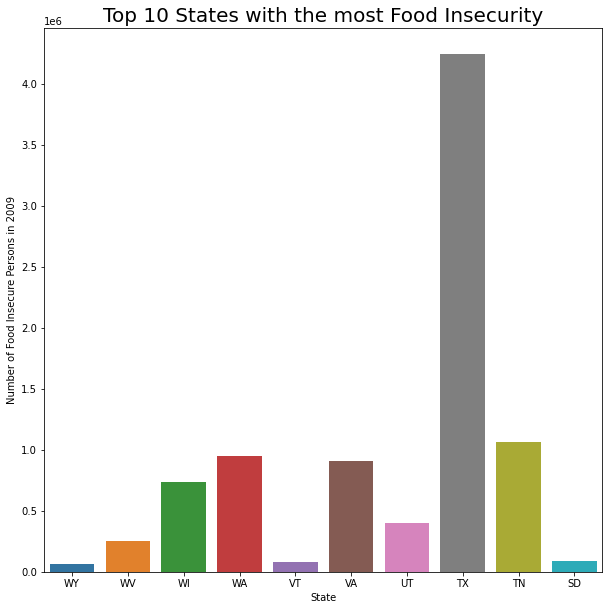

In [32]:
top_10_HH = food_insecurity.groupby(by = 'State').max()[['Number of Food Insecure Persons in 2009', '2019 Cost Per Meal']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States with the most Food Insecurity", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:10], y = "Number of Food Insecure Persons in 2009", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("Number of Food Insecure Persons in 2009")
plt.show()

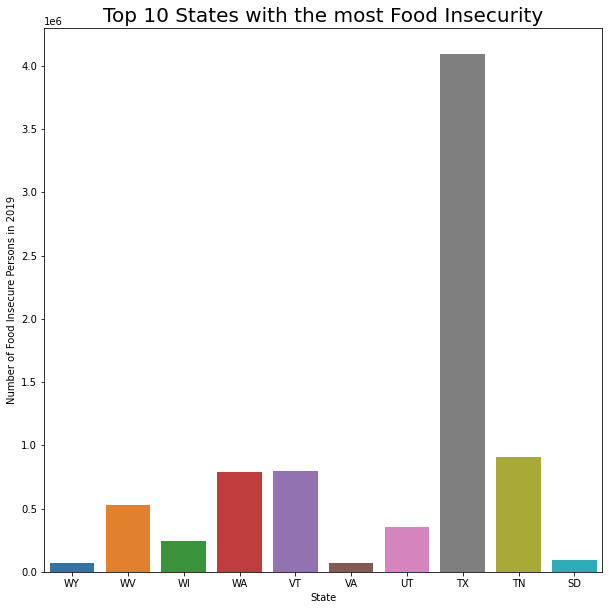

In [33]:
top_10_HH = food_insecurity.groupby(by = 'State').max()[['Number of Food Insecure Persons in 2019', '2019 Cost Per Meal']].sort_values(by = ['State'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,10))
plt.title("Top 10 States with the most Food Insecurity", size = 20)
ax = sns.barplot(data = top_10_HH.iloc[:10], y = "Number of Food Insecure Persons in 2019", x = "State", linewidth = 2)
plt.xlabel("State")
plt.ylabel("Number of Food Insecure Persons in 2019")
plt.show()

# Create a Contingency Table

In [34]:
food_insecurity2_crosstab = pd.crosstab(food_insecurity['Number of Food Insecure Persons in 2009'], food_insecurity['2019 Weighted Annual Food Budget Shortfall'])
food_insecurity2_crosstab.head()

2019 Weighted Annual Food Budget Shortfall,27899000,36177000,42174000,47824000,49250000,53905000,56049000,59135000,62002000,71451000,94193000,97005000,105832000,111822000,113985000,146743000,150238000,177384000,178573000,198678000,233398000,233680000,248587000,260033000,263205000,273100000,279337000,288155000,302792000,324827000,354460000,357197000,364715000,390646000,405611000,409972000,433418000,433605000,444703000,475515000,475763000,620329000,650777000,664862000,724977000,733806000,757327000,1182879000,1440472000,1872381000,2233636000
Number of Food Insecure Persons in 2009,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63280,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82270,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
90300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92220,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
stats.chi2_contingency(food_insecurity2_crosstab)

(2550.0000000000005,
 0.2382758494586141,
 2500,
 array([[0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        ...,
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784]]))

# Correlation

In [36]:
food_insecurity['2009 Cost Per Meal'].corr(food_insecurity['2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL'])

-0.236907919666896

In [37]:
## Both '2009 Cost Per Meal' & '2009 % Food Insecure Children in HH w/HH Incomes Below 185' is related -0.24, this correlation
#is negative, which means that the 2009 Coster Per Meal decrease, as well as the 2009 % Food Insecure Children in HH w/HH Incomes Below 185.

In [38]:
food_insecurity.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [39]:
food_insecurity['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

# Data Wrangling

In [40]:
# Choosing the Top 10 States in Food Insecurity

Top_10_States= ['WY', 'WV','WI', 'WA', 'VT', 'VA', 'UT', 'TX', 'TN', 'SD']

In [41]:
food_insecurity1 = food_insecurity['State'].isin(Top_10_States)
food_insecurity1

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
Name: State, dtype: bool

In [42]:
food_insecurity2 = food_insecurity[food_insecurity1].copy()
food_insecurity2['State'].unique()

array(['SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

In [43]:
food_insecurity2

,State,2009 Food Insecurity Rate,Number of Food Insecure Persons in 2009,2009 Cost Per Meal,2009 Child Food Insecurity Rate,Number of Food Insecure Children in 2009,2009 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2009 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2009 Weighted Annual Food Budget Shortfall,2010 Food Insecurity Rate,Number of Food Insecure Persons in 2010,2010 Cost Per Meal,2010 Child Food Insecurity Rate,Number of Food Insecure Children in 2010,2010 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2010 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2010 Weighted Annual Food Budget Shortfall,2011 Food Insecurity Rate,Number of Food Insecure Persons in 2011,2011 Cost Per Meal,2011 Child Food Insecurity Rate,Number of Food Insecure Children in 2011,2011 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2011 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2011 Weighted Annual Food Budget Shortfall,2012 Food Insecurity Rate,Number of Food Insecure Persons in 2012,2012 Cost Per Meal,2012 Child Food Insecurity Rate,Number of Food Insecure Children in 2012,2012 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2012 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2012 Weighted Annual Food Budget Shortfall,2013 Food Insecurity Rate,Number of Food Insecure Persons in 2013,2013 Cost Per Meal,2013 Child Food Insecurity Rate,Number of Food Insecure Children in 2013,2013 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2013 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2013 Weighted Annual Food Budget Shortfall,2014 Food Insecurity Rate,Number of Food Insecure Persons in 2014,2014 Cost Per Meal,2014 Child Food Insecurity Rate,Number of Food Insecure Children in 2014,2014 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2014 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2014 Weighted Annual Food Budget Shortfall,2015 Food Insecurity Rate,Number of Food Insecure Persons in 2015,2015 Cost Per Meal,2015 Child Food Insecurity Rate,Number of Food Insecure Children in 2015,2015 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2015 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2015 Weighted Annual Food Budget Shortfall,2016 Food Insecurity Rate,Number of Food Insecure Persons in 2016,2016 Cost Per Meal,2016 Child Food Insecurity Rate,Number of Food Insecure Children in 2016,2016 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2016 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2016 Weighted Annual Food Budget Shortfall,2017 Food Insecurity Rate,Number of Food Insecure Persons in 2017,2017 Cost Per Meal,2017 Child Food Insecurity Rate,Number of Food Insecure Children in 2017,2017 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2017 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2017 Weighted Annual Food Budget Shortfall,2018 Food Insecurity Rate,Number of Food Insecure Persons in 2018,2018 Cost Per Meal,2018 Child Food Insecurity Rate,Number of Food Insecure Children in 2018,2018 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2018 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2018 Weighted Annual Food Budget Shortfall,2019 Food Insecurity Rate,Number of Food Insecure Persons in 2019,2019 Cost Per Meal,2019 Child Food Insecurity Rate,Number of Food Insecure Children in 2019,2019 % Food Insecure Children in HH w/HH Incomes Below 185 FPL,2019 % Food Insecure Children in HH w/HH Incomes Above 185 FPL,2019 Weighted Annual Food Budget Shortfall,State levels_insecurity
41,SD,0.116,92220,2.59842,0.196,38440,0.60,0.40,4.003489e+07,0.125505,102470,2.45,0.179041,35450,0.62,0.38,43213400,0.125206,103180,2.60,0.183213,36110,0.599834,0.400166,43735050,0.123429,102860,2.742523,0.184960,37770,0.62,0.38,49405000,0.124420,105120,2.79,0.196101,40040,0.65,0.35,51928000,0.124,105880,2.92,0.185,39030,0.63,0.37,54553000,0.121,104140,2.94,0.180,37670,

In [44]:
food_insecurity3 = food_insecurity2[['2009 Cost Per Meal', 'State']]
food_insecurity3

,2009 Cost Per Meal,State
41,2.59842,SD
42,2.57810,TN
43,2.35966,TX
44,2.44602,UT
45,2.68224,VA
46,3.01498,VT
47,2.58572,WA
48,2.32918,WI
49,2.49174,WV
50,2.57556,WY


In [45]:
food_insecurity3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 41 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2009 Cost Per Meal  10 non-null     float64
 1   State               10 non-null     object 
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [46]:
#food_insecurity3.rename(columns={'2009 Food Insecurity Rate' : '2009 Food Insecurity Rate'}, inplace=True)
food_insecurity3['2009 Cost Per Meal'] = food_insecurity3['2009 Cost Per Meal'].astype(int)

<ipython-input-46-de1b88d5e200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_insecurity3['2009 Cost Per Meal'] = food_insecurity3['2009 Cost Per Meal'].astype(int)


In [47]:
food_insecurity3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 41 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   2009 Cost Per Meal  10 non-null     int32 
 1   State               10 non-null     object
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


In [48]:
food_insecurity3 = food_insecurity2[['2019 Cost Per Meal', 'State']]
food_insecurity3

,2019 Cost Per Meal,State
41,3.06,SD
42,3.07,TN
43,2.68,TX
44,2.94,UT
45,3.60,VA
46,3.17,VT
47,3.21,WA
48,2.75,WI
49,2.90,WV
50,3.12,WY


In [49]:
food_insecurity3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 41 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2019 Cost Per Meal  10 non-null     float64
 1   State               10 non-null     object 
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


In [50]:
food_insecurity3['2019 Cost Per Meal'] = food_insecurity3['2019 Cost Per Meal'].astype(int)

<ipython-input-50-f0c3e6eb44b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_insecurity3['2019 Cost Per Meal'] = food_insecurity3['2019 Cost Per Meal'].astype(int)


In [51]:
food_insecurity3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 41 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   2019 Cost Per Meal  10 non-null     int32 
 1   State               10 non-null     object
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


In [52]:
food_insecurity3 = food_insecurity2[['Number of Food Insecure Persons in 2009', 'State']]
food_insecurity3

,Number of Food Insecure Persons in 2009,State
41,92220,SD
42,1064160,TN
43,4245970,TX
44,399560,UT
45,912790,VA
46,82270,VT
47,953820,WA
48,733180,WI
49,253580,WV
50,63280,WY


# Recoding State to a Number

In [53]:
def recode (series):
    if series == "SD": 
        return 0
    if series == "TN": 
        return 1
    if series == "TX": 
        return 2
    if series == "UT":
        return 3
    if series == "VA":
        return 4
    if series == "VT":
        return 5
    if series == "WA":
        return 6
    if series == "WI":
        return 7
    if series == "WV":
        return 8
    if series == "WY":
        return 9

food_insecurity3['StateR'] = food_insecurity3['State'].apply(recode)

<ipython-input-53-3cd73e65072e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_insecurity3['StateR'] = food_insecurity3['State'].apply(recode)


In [54]:
food_insecurity3.head()

,Number of Food Insecure Persons in 2009,State,StateR
41,92220,SD,0
42,1064160,TN,1
43,4245970,TX,2
44,399560,UT,3
45,912790,VA,4


In [55]:
food_insecurity4 = food_insecurity3[['StateR','Number of Food Insecure Persons in 2009']]

In [56]:
food_insecurity4.head()

,StateR,Number of Food Insecure Persons in 2009
41,0,92220
42,1,1064160
43,2,4245970
44,3,399560
45,4,912790


# Test Assumptions
### Normality

C:\Users\Ivette\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Food Insecure Persons in 2009', ylabel='Density'>

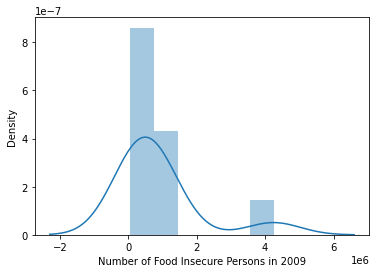

In [57]:
sns.distplot(food_insecurity4['Number of Food Insecure Persons in 2009'])

In [58]:
food_insecurity4['Number of Food Insecure Persons in 2009SQRT'] = np.sqrt(food_insecurity4['Number of Food Insecure Persons in 2009'])
food_insecurity4.head()

,StateR,Number of Food Insecure Persons in 2009,Number of Food Insecure Persons in 2009SQRT
41,0,92220,303.677460
42,1,1064160,1031.581310
43,2,4245970,2060.575162
44,3,399560,632.107586
45,4,912790,955.400440


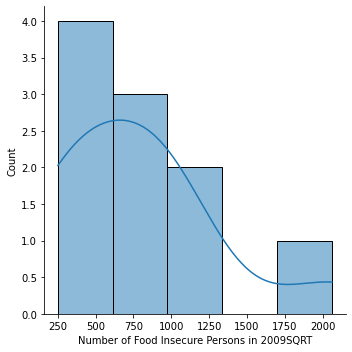

In [59]:
sns.displot(food_insecurity4, x='Number of Food Insecure Persons in 2009SQRT', kde=True)

In [60]:
food_insecurity4['Number of Food Insecure Persons in 2009LOG'] = np.log(food_insecurity4['Number of Food Insecure Persons in 2009'])
food_insecurity4.head()

,StateR,Number of Food Insecure Persons in 2009,Number of Food Insecure Persons in 2009SQRT,Number of Food Insecure Persons in 2009LOG
41,0,92220,303.677460,11.431932
42,1,1064160,1031.581310,13.877696
43,2,4245970,2060.575162,15.261481
44,3,399560,632.107586,12.898119
45,4,912790,955.400440,13.724261


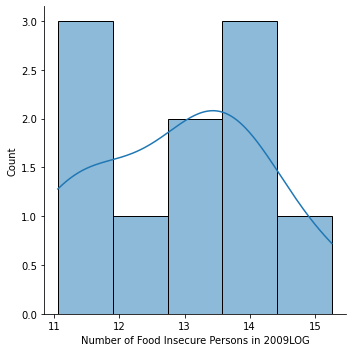

In [61]:
sns.displot(food_insecurity4, x='Number of Food Insecure Persons in 2009LOG', kde=True)

In [62]:
scipy.stats.fligner(food_insecurity4['Number of Food Insecure Persons in 2009LOG'], food_insecurity4['StateR'])
#scipy.stats.fligner(food_insecurity4['Number of Food Insecure Persons in 2009LOG'], food_insecurity4['StateR'])

FlignerResult(statistic=4.63173782532095, pvalue=0.03138575798921394)

In [63]:
stats.f_oneway(food_insecurity4['Number of Food Insecure Persons in 2009LOG'][food_insecurity4['StateR']==0],
                    food_insecurity4['Number of Food Insecure Persons in 2009LOG'][food_insecurity4['StateR']==1],
                    food_insecurity4['Number of Food Insecure Persons in 2009LOG'][food_insecurity4['StateR']==2])

C:\Users\Ivette\anaconda3\lib\site-packages\scipy\stats\stats.py:3688: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


F_onewayResult(statistic=nan, pvalue=nan)

# Determine Means and Draw Conclusions

In [64]:
food_insecurity4.groupby('StateR').mean().groupby('StateR').mean()

,Number of Food Insecure Persons in 2009,Number of Food Insecure Persons in 2009SQRT,Number of Food Insecure Persons in 2009LOG
StateR,,,
0,92220,303.677460,11.431932
1,1064160,1031.581310,13.877696
2,4245970,2060.575162,15.261481
3,399560,632.107586,12.898119
4,912790,955.400440,13.724261
5,82270,286.827474,11.317762
6,953820,976.637087,13.768230
7,733180,856.259307,13.505147
8,253580,503.567275,12.443435
